<a href="https://colab.research.google.com/github/aragakerubo/cis635-homework-assignments/blob/main/Hilda_Ogamba_Homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2: Feature Selection

## Introduction

In this assignment, you will implement the **Incremental Association Markov Blanket (IAMB)** algorithm in Python and explore its impact on feature selection for machine learning models, focusing specifically on the Bayesian Network approach. The IAMB algorithm incrementally selects features that have the strongest association with a target variable, resulting in a subset that approximates the Markov Blanket. This feature selection process is crucial for identifying the most relevant variables and can lead to improved model performance and interpretability.

## Objectives

This assignment aims to:
- Implement a simplified version of the IAMB algorithm based on pseudocode.
- Apply IAMB for feature selection on a sample dataset (Pima Indians Diabetes Dataset).
- Evaluate and compare model performance with and without IAMB-based feature selection using **Gaussian Naive Bayes**.

### Pima Indians Diabetes Dataset
The Pima Indian Diabetes Dataset, originally from the National Institute of Diabetes and Digestive and Kidney Diseases, contains information of 768 women from a population near Phoenix, Arizona, USA. The outcome tested was Diabetes, 258 tested positive and 500 tested negative. Therefore, there is one target (dependent) variable and the following attributes (TYNECKI, 2018):

- Pregnancies (number of times pregnant),

- Oral glucose tolerance test - OGTT (two hour plasma glucose concentration after 75g anhydrous glucose in mg/dl),

- Blood Pressure (Diastolic Blood Pressure in mmHg),

- Skin Thickness (Triceps skin fold thickness in mm),

- Insulin (2 h serum insulin in mu U/ml),

- BMI (Body Mass Index in kg/m2),

- Age (years),

- Pedigree Diabetes Function ('function that represents how likely they are to get the disease by extrapolating from their ancestor's history')

### Incremental Association Markov Blanket (IAMB)

The Incremental Association Markov Blanket (IAMB) algorithm is a feature selection method used in Bayesian Networks. It identifies a Markov Blanket, which is the minimal set of variables containing all information relevant to the target variable. IAMB operates in two phases:
1. **Forward phase**: Incrementally adds variables to the Markov Blanket that have strong associations with the target, given the current Markov Blanket set.
2. **Backward phase**: Removes variables that may not contribute significantly to the target variable, ensuring a minimal and relevant set of predictors.

### Pseudocode for IAMB

```plaintext
IAMB Algorithm (simple version)

Input: Target variable Y, Dataset D
Output: Markov Blanket of Y (MB_Y)

1. Initialize MB_Y = {} (empty set)
2. Forward phase:
    While there exists a variable X not in MB_Y that has a high association with Y given MB_Y:
        Add X to MB_Y
3. Backward phase:
    For each variable X in MB_Y:
        If X is independent of Y given (MB_Y - {X}):
            Remove X from MB_Y
4. Return MB_Y
```

### Using Pingouin for Partial Correlation

In this assignment, you will use the `pingouin` library to calculate partial correlation as the measure of association for the IAMB algorithm. This calculation will help you assess the conditional relationship between features and the target variable. Detailed usage of the `pingouin.partial_corr` API can be found here: [Pingouin Partial Correlation](https://pingouin-stats.org/build/html/generated/pingouin.partial_corr.html#pingouin.partial_corr).

## Assignment Instructions

1. **Implement the IAMB Algorithm**:
   - Write a Python function based on the pseudocode provided to implement IAMB. Your function should iteratively add and remove features from the Markov Blanket of the target variable using partial correlation as the criterion for conditional association.

2. **Apply IAMB for Feature Selection**:
   - Use the `pima-indians-diabetes.data.csv` dataset. This dataset contains features relevant to predicting diabetes in individuals. After loading the data, apply the IAMB algorithm to select features most relevant to the target variable (`Outcome`).
   
3. **Evaluate Model Performance**:
   - Split the data into 70% training and 30% testing sets.
   - Train a **Gaussian Naive Bayes** classifier using:
     - **All features** (baseline model).
     - **IAMB-selected features** (feature-reduced model).
   - Compare the performance of both models on the test set using the following metrics:
     - **Accuracy**
     - **F1 Score** (weighted)
     - **AUC-ROC** (weighted)
   - Display your evaluation metrics in a clear table format for comparison.

### Resources for Reference
- **Gaussian Naive Bayes**: [Scikit-Learn GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
- **Evaluation Metrics**: [Scikit-Learn Metrics Documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)

### Expected Output
A comparison table showing the performance of the model trained with all features versus the model trained with IAMB-selected features, specifically looking at Accuracy, F1 Score, and AUC-ROC on the test data.


### Grading

Your assignment will be graded based on the following criteria, totaling 100 points:

- **IAMB Algorithm Implementation (30 points)**: Correctly implementing the Incremental Association Markov Blanket (IAMB) algorithm, following the provided pseudocode, and calculating partial correlation accurately.
  
- **Application on Dataset (20 points)**: Properly applying the IAMB algorithm on the provided dataset, selecting relevant features, and preparing data for model evaluation.

- **Performance Evaluation (20 points)**: Training and evaluating a Gaussian Naive Bayes model with all features versus the IAMB-selected features, accurately calculating and reporting metrics (Accuracy, F1 Score, and AUC-ROC).

- **Interpretation of Results (15 points)**: Analyzing and discussing the model performance comparison, including the impact of feature selection on model accuracy and efficiency.

- **Documentation and Code Quality (15 points)**: Clear, well-organized code with comments and explanations of each section. Proper documentation and presentation of results in a readable format.

Each section will be evaluated on accuracy, clarity, and completeness.

## Import and Setting

In [ ]:
!pip install pingouin

In [ ]:
import pandas as pd
import numpy as np
import pingouin as pg
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
%matplotlib inline
from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt

In [ ]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper left"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)

### Data Loading
Load the Pima Indians Diabetes dataset as a data frame `data`

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'

# Column names for the dataset
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url,names=column_names)
display(data.shape)
data.head()


(768, 9)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Implement the IAMB Algorithm

The IAMB algorithm identifies a Markov Blanket for the target variable, which consists of the minimal set of features that contain all relevant information about the target variable. The algorithm works in two phases:

1. **Forward Phase**: Incrementally adds features highly correlated with the target variable.
2. **Backward Phase**: Removes features that don’t contribute significantly to the target, leaving only the most relevant features.

In [ ]:
# IAMB implementation with partial correlation
def iamb(target, dataset, alpha=0.05) -> list:
    """
    This function implements the IAMB algorithm to find the Markov Blanket of a target variable Y in a dataset D.

    Parameters:
        target (str): The name of the target variable Y.
        dataset (pd.DataFrame): The dataset D containing the target variable Y and other variables.
        alpha (float): The significance level for testing the independence between variables.

    Returns:
        mb_y (list): The Markov Blanket of the target variable Y.
    """
    # Initialize MB_Y as an empty set, which will store the variables in the Markov Blanket
    mb_y = set()

    # Forward phase: Identify variables to add to MB_Y based on their association with the target
    for column in dataset.columns:
        # Skip the target variable itself
        if column != target:
            # Check the association of the current column with the target given the current MB_Y
            # Using partial correlation to condition on the variables already in MB_Y
            corr = pg.partial_corr(
                data=dataset,
                x=column,
                y=target,
                covar=list(mb_y),  # List of variables in the current MB_Y as covariates
                method="pearson",  # Using Pearson correlation for association measure
            )["p-val"].values[0]  # Extract the p-value for the correlation

            # If the association (p-value) is statistically significant (below the threshold alpha)
            if corr < alpha:
                # Add the variable to MB_Y
                mb_y.add(column)

    # Backward phase: Refine MB_Y by removing variables that are not necessary
    for column in mb_y.copy():  # Iterate over a copy of MB_Y to allow safe modification
        # Check if the current column is conditionally independent of the target
        # given the rest of MB_Y (i.e., MB_Y without this column)
        columns_without_x = mb_y - {column}  # Subtract the current column from MB_Y
        corr = pg.partial_corr(
            data=dataset,
            x=column,
            y=target,
            covar=list(columns_without_x),  # Use the remaining variables in MB_Y as covariates
            method="pearson",
        )["p-val"].values[0]  # Extract the p-value for the partial correlation

        # If the variable is conditionally independent of the target (p-value >= alpha)
        if corr >= alpha:
            # Remove the variable from MB_Y as it is not needed in the Markov Blanket
            mb_y.remove(column)

    # Return the Markov Blanket as a list of variable names
    return list(mb_y)

### Apply IAMB for Feature Selection

Using the `iamb` function, we identify the most relevant features for predicting diabetes.

- The `target_variable` is `Outcome`, our dependent variable.
- The `selected_features` list contains features retained after applying the IAMB algorithm.

In [ ]:
# Apply IAMB for Feature Selection
target_variable = "Outcome"
selected_features = iamb(target_variable, data)
print("\nSelected Features:", selected_features)


Selected Features: ['BMI', 'DiabetesPedigreeFunction', 'Pregnancies', 'Glucose']


### Evaluate Model Performance

We now evaluate model performance with two versions of our feature set: all features (baseline) and only the IAMB-selected features.

#### 1\. Split the Data

In [ ]:
X = data.drop(columns=[target_variable])
y = data[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

- `X` contains all features except `Outcome`, while `y` contains only the `Outcome` column.
- We use `train_test_split` to divide the data into training and testing sets with a 70-30 split.

#### 2\. Train the Gaussian Naive Bayes Model

**A\. Baseline Model (All Features)**

In [ ]:
# Train Gaussian Naive Bayes using all features
gnb_all = GaussianNB()
gnb_all.fit(X_train, y_train)
y_pred_all = gnb_all.predict(X_test)

- `GaussianNB`: A Naive Bayes classifier optimized for continuous features. Here, it is trained on all available features (`X_train`).

**B\. Feature-Reduced Model (IAMB-Selected Features)**

In [ ]:
# Train Gaussian Naive Bayes using IAMB-selected features
X_train_iamb = X_train[selected_features]
X_test_iamb = X_test[selected_features]

gnb_iamb = GaussianNB()
gnb_iamb.fit(X_train_iamb, y_train)
y_pred_iamb = gnb_iamb.predict(X_test_iamb)

- We train the same `GaussianNB` model on the subset of features selected by IAMB (`X_train_iamb`).

#### 3\. Compute Evaluation Metrics

For both models, we calculate the Accuracy, F1 Score, and AUC-ROC on the test data.

In [ ]:
# Evaluate metrics for the model using all features
acc_all = accuracy_score(y_test, y_pred_all)
f1_all = f1_score(y_test, y_pred_all, average='weighted')
auc_all = roc_auc_score(y_test, gnb_all.predict_proba(X_test)[:, 1])

# Evaluate metrics for the model using IAMB-selected features
acc_iamb = accuracy_score(y_test, y_pred_iamb)
f1_iamb = f1_score(y_test, y_pred_iamb, average='weighted')
auc_iamb = roc_auc_score(y_test, gnb_iamb.predict_proba(X_test_iamb)[:, 1])

The comparison between models trained on all features versus those trained on IAMB-selected features can demonstrate if feature selection improves efficiency and performance.

In [ ]:
# Display results
results = pd.DataFrame({
    'Model': ['All Features', 'IAMB-selected Features'],
    'Accuracy': [acc_all, acc_iamb],
    'F1 Score': [f1_all, f1_iamb],
    'AUC-ROC': [auc_all, auc_iamb]
})
print("\nModel Performance Comparison:")
display(results)


Model Performance Comparison:


,Model,Accuracy,F1 Score,AUC-ROC
0,All Features,0.744589,0.746309,0.790480
1,IAMB-selected Features,0.770563,0.769499,0.828063


**Key Takeaways**:

- **Improved Accuracy**: The IAMB-selected model (0.770563) shows better accuracy than the all-features model (0.744589), indicating more reliable predictions.
- **Higher F1 Score**: The increase in F1 score (0.769499 vs. 0.746309) suggests that the IAMB model strikes a better balance between precision and recall.
- **Superior AUC-ROC**: A notable improvement in AUC-ROC (0.828063 vs. 0.790480) reflects the IAMB model's enhanced ability to differentiate between positive and negative cases.

**Inference**:

The **IAMB-selected model** outperforms the **all-features model** across all metrics, demonstrating that feature selection helps create a more focused, accurate, and effective predictive model.


#### 4\. Plot the ROC Curve

Visualize the model's performance with ROC curves.

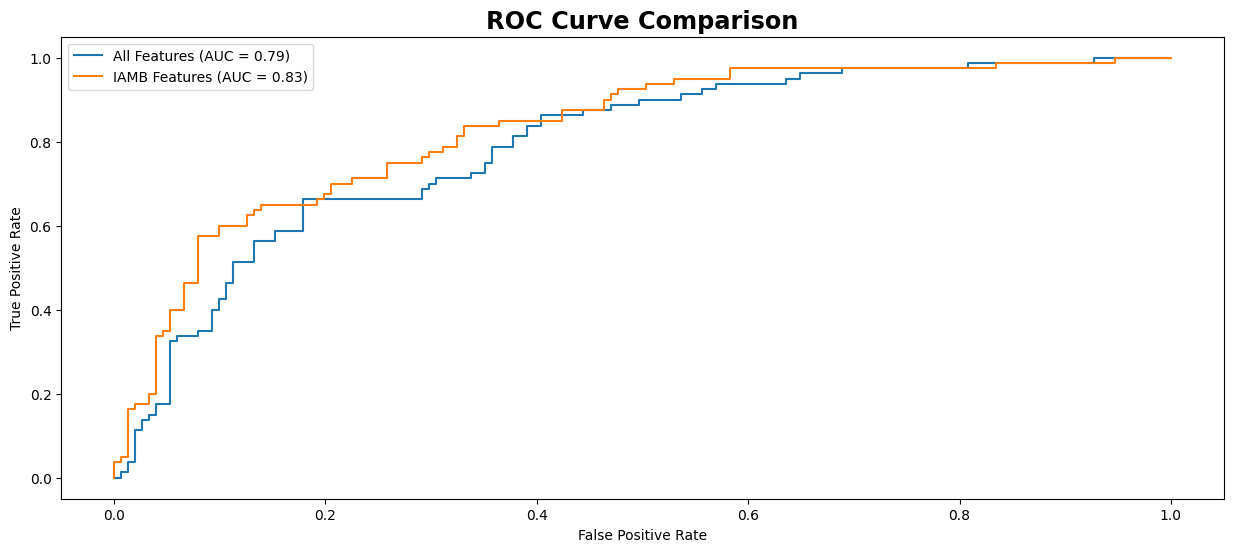

In [ ]:
# Plot ROC curves for both models
fpr_all, tpr_all, _ = roc_curve(y_test, gnb_all.predict_proba(X_test)[:, 1])
fpr_iamb, tpr_iamb, _ = roc_curve(y_test, gnb_iamb.predict_proba(X_test_iamb)[:, 1])

plt.figure()
plt.plot(fpr_all, tpr_all, label='All Features (AUC = {:.2f})'.format(auc_all))
plt.plot(fpr_iamb, tpr_iamb, label='IAMB Features (AUC = {:.2f})'.format(auc_iamb))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

- The ROC curve visualizes the trade-off between true positive rate and false positive rate, providing an overview of model classification performance.
- This step helps understand how the model behaves at different threshold levels and compares the predictive power of models with different feature sets.

## Conclusion

The results demonstrate that feature selection using the IAMB algorithm significantly enhances model performance by focusing on the most relevant predictors—**['Glucose', 'DiabetesPedigreeFunction', 'BMI', 'Pregnancies']**. The IAMB-selected model outperforms the all-features model across all key metrics, showing higher **accuracy** (0.770563 vs. 0.744589), **F1 score** (0.769499 vs. 0.746309), and **AUC-ROC** (0.828063 vs. 0.790480). This indicates that the selected subset of features not only improves predictive power but also maintains a better balance between precision and recall. By using only these four features, the model is simpler, more interpretable, and computationally efficient while still achieving superior performance. Overall, this underscores the importance of targeted feature selection to build effective, robust, and interpretable machine learning models.